In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./reddit_scraped_cleaned.csv')

In [4]:
df.head()

,downs,is_self,is_video,num_comments,score,selftext,y_value,title,text_length,title_length
0,0,1,0,4,233,Please find links to all of the chapter discus...,1,(Spoilers Extended) Fire and Blood Volume I: O...,1009,68
1,0,1,0,34,7,Welcome to the Weekly Q &amp; A! Feel free to ...,1,(Spoilers Main) Weekly Q and A,346,30
2,0,1,0,75,224,So let me just preface this by saying I starte...,1,[SPOILERS PUBLISHED] I Just finished the Tales...,2864,108
3,0,1,0,266,333,In ACOK when Daenerys learns about the death ...,1,[Spoilers MAIN] Instances of Unreliable narrat...,2600,71
4,0,1,0,46,24,Listening to the World of Ice and Fire right n...,1,"[Spoilers Published] Wyverns, ice dragons, sea...",571,153


In [5]:
df.shape

(1930, 10)

In [6]:
df.rename(index=str, columns={"subreddit": "y_value"}, inplace=True)

In [7]:
title = df[['y_value', 'title']]

In [8]:
title.y_value.values

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
y_true = df['y_value'].values

In [10]:
#imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
#Instatiate Count Vectorizer

cv = CountVectorizer(stop_words='english')

cv.fit(title['title'])

title_vect = cv.transform(title['title'])

title_vect_df = pd.DataFrame(title_vect.toarray(), columns=cv.get_feature_names())

In [12]:
title_vect_df.shape

(1930, 3495)

In [13]:
title_vect_df['y_value'] = y_true

In [14]:
title_vect_df.head()

,000,03,10,100,101,106,107,11,110,11x13,...,yi,young,younger,youtube,youtuber,yule,zealand,zinn,zirakzigil,y_value
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
title_vect_df.shape

(1930, 3496)

In [111]:
title_vect_df['spoiler'].value_counts()

0    1909
1      21
Name: spoiler, dtype: int64

In [16]:
#create variable of ASOIF features sorted by most common words
common_asoif_words = title_vect_df[title_vect_df.y_value == 1].sum().sort_values(ascending=False).index

In [17]:
common_asoif_words

Index(['y_value', 'spoilers', 'extended', 'main', 'published', 'blood', 'amp',
       'asoiaf', 'theory', 'westeros',
       ...
       'shortcut', 'mithril', 'fun', 'shop', 'funeral', 'shooting', 'funny',
       'fused', 'shocked', 'lightpainting'],
      dtype='object', length=3496)

In [18]:
common_asoif_lens = title_vect_df[title_vect_df.y_value == 1].sum().sort_values(ascending=False).values

In [85]:
words_df = pd.DataFrame({'words': common_asoif_words, 'counts': common_asoif_lens})

In [88]:
words_df.drop(0,inplace = True)

In [90]:
words = words_df.reset_index(drop=True)

In [91]:
words.head()

,words,counts
0,spoilers,919
1,extended,581
2,main,215
3,published,76
4,blood,75


In [19]:
#create variable of LOTR features sorted by most common words
common_lotr_words = title_vect_df[title_vect_df.y_value == 0].sum().sort_values(ascending=False).index

In [20]:
common_lotr_words

Index(['lotr', 'ring', 'rings', 'lord', 'time', 'just', 'tolkien', 'earth',
       'middle', 'sauron',
       ...
       'list', 'literary', 'littlefinger', 'lml', 'locations', 'longer',
       'lothar', 'louis', 'lovecraft', '000'],
      dtype='object', length=3496)

In [21]:
title_vect_df[title_vect_df.y_value == 1].sum().sort_values(ascending=False).values

array([939, 919, 581, ...,   0,   0,   0])

In [ ]:
# most_common_asoif = []
# for i in list(range(len(common_asoif))):
#     if i > 0:
#         most_common_asoif.append(common_asoif[i].index)

In [ ]:
#most_common_asoif

### Lemmatized

In [23]:
df_2 = pd.read_csv('./lemmatized_column_added.csv')

In [24]:
df_2.y_value.values

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
df_2.lemmatized.fillna('', inplace=True)

In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 11 columns):
downs           1930 non-null int64
is_self         1930 non-null int64
is_video        1930 non-null int64
num_comments    1930 non-null int64
score           1930 non-null int64
selftext        1149 non-null object
y_value         1930 non-null int64
title           1930 non-null object
text_length     1930 non-null int64
title_length    1930 non-null int64
lemmatized      1930 non-null object
dtypes: int64(8), object(3)
memory usage: 165.9+ KB


In [27]:
#Instatiate Count Vectorizer

cv = CountVectorizer(stop_words='english')

cv.fit(df_2['lemmatized'])

title_vect = cv.transform(df_2['lemmatized'])

title_vect_df = pd.DataFrame(title_vect.toarray(), columns=cv.get_feature_names())

In [28]:
df['y_value'].values

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
title_vect_df['y_value'] = df['y_value'].values

In [48]:
title_vect_df.shape

(1930, 3126)

The aim here is to create some visualizations that can demonstrate the words used.

In [103]:
title_vect_df[title_vect_df['y_value'] == 0].shape

(991, 3126)

In [30]:
#words where y_value == 1, or that are associated with ASOIAF
lemmatized_asoiaf_words = title_vect_df[title_vect_df['y_value'] == 1].sum().sort_values(ascending = False)

In [31]:
#Drop y_value from this list
lemmatized_asoiaf_words.drop('y_value', inplace = True)

In [32]:
lemmatized_lotr_words = title_vect_df[title_vect_df['y_value'] == 0].sum().sort_values(ascending = False)

In [99]:
len(lemmatized_lotr_words)

3126

In [100]:
len(lemmatized_asoiaf_words)

3125

In [35]:
asoiaf_values = [lemmatized_asoiaf_words.values[i] for i in list(range(len(lemmatized_asoiaf_words)))]

In [36]:
asoiaf_words = [lemmatized_asoiaf_words.index[i] for i in list(range(len(lemmatized_asoiaf_words)))]

In [37]:
lotr_values = [lemmatized_lotr_words.values[i] for i in list(range(len(lemmatized_lotr_words)))]

In [38]:
lotr_words = [lemmatized_lotr_words.index[i] for i in list(range(len(lemmatized_lotr_words)))]

<BarContainer object of 29 artists>

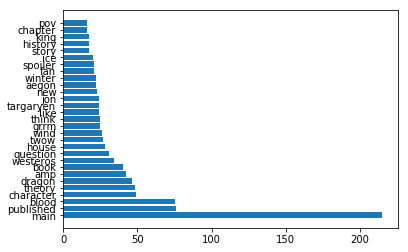

In [39]:
plt.barh(asoiaf_words[:29], asoiaf_values[:29])

<BarContainer object of 29 artists>

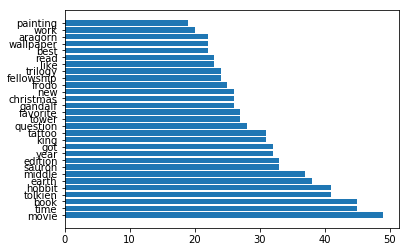

In [40]:
plt.barh(lotr_words[:29], lotr_values[:29])

In [43]:
{k:v for k, v in zip(asoiaf_words, asoiaf_values)}

{'main': 215,
 'published': 76,
 'blood': 75,
 'character': 49,
 'theory': 48,
 'dragon': 46,
 'amp': 42,
 'book': 40,
 'westeros': 34,
 'question': 31,
 'house': 28,
 'twow': 27,
 'wind': 26,
 'grrm': 25,
 'think': 25,
 'like': 24,
 'targaryen': 24,
 'jon': 24,
 'new': 23,
 'aegon': 22,
 'winter': 22,
 'fan': 21,
 'spoiler': 21,
 'ice': 20,
 'story': 17,
 'history': 17,
 'king': 17,
 'chapter': 16,
 'pov': 16,
 'best': 16,
 'favorite': 16,
 'read': 15,
 'george': 15,
 'egg': 15,
 'night': 14,
 'know': 14,
 'got': 14,
 'thought': 13,
 'end': 13,
 'season': 13,
 'robert': 12,
 'volume': 12,
 'reading': 12,
 'tyrion': 12,
 'stark': 12,
 'series': 12,
 'dance': 12,
 'lannister': 11,
 'long': 11,
 'post': 11,
 'sea': 11,
 'old': 11,
 'dany': 11,
 'point': 11,
 'arya': 11,
 'frey': 11,
 'time': 10,
 'thing': 10,
 'people': 10,
 'discussion': 10,
 'martin': 10,
 'ned': 10,
 'tywin': 10,
 'art': 10,
 'foreshadowing': 10,
 'rhaegar': 9,
 'writing': 9,
 'want': 9,
 'regarding': 9,
 'great': 9,


In [47]:
len([i for i in asoiaf_words if i in lotr_words])

3125

In [75]:
new_lotr_words = []
for i in list(range(len(lemmatized_lotr_words))):
    if lemmatized_lotr_words[i]>0:
        new_lotr_words.append(lemmatized_lotr_words.index[i])

In [76]:
len(new_lotr_words)

2108

In [77]:
new_asoiaf_words = []
for i in list(range(len(lemmatized_asoiaf_words))):
    if lemmatized_asoiaf_words[i]>0:
        new_asoiaf_words.append(lemmatized_asoiaf_words.index[i])

In [78]:
len(new_asoiaf_words)

1529

In [80]:
pd.DataFrame({'words': asoiaf_words, 'count': asoiaf_values}).head(20)

,words,count
0,main,215
1,published,76
2,blood,75
3,character,49
4,theory,48
5,dragon,46
6,amp,42
7,book,40
8,westeros,34
9,question,31
